In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Set2")

In [2]:
file_path = r"C:\Users\DELL\Downloads\21. sales_data_final.csv"

if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(file_path)
else:
    raise ValueError("Unsupported file type. Please use CSV or Excel.")

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


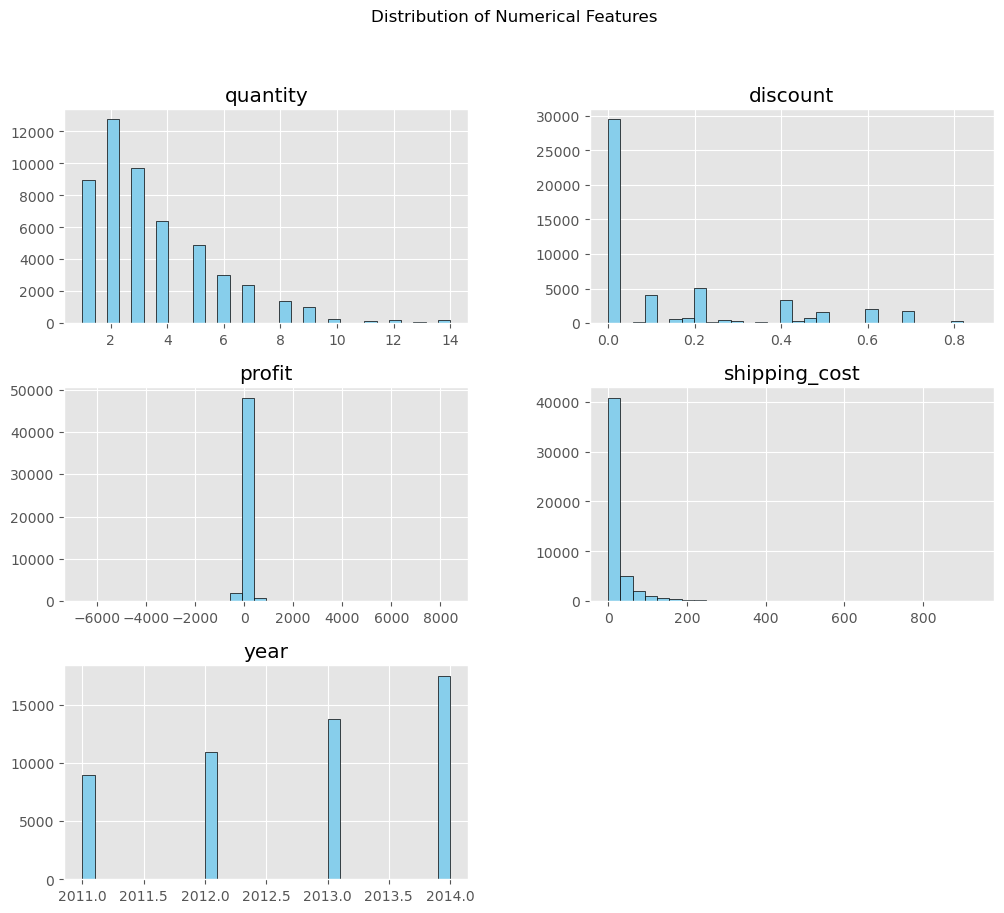

In [3]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

df[num_cols].hist(figsize=(12,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

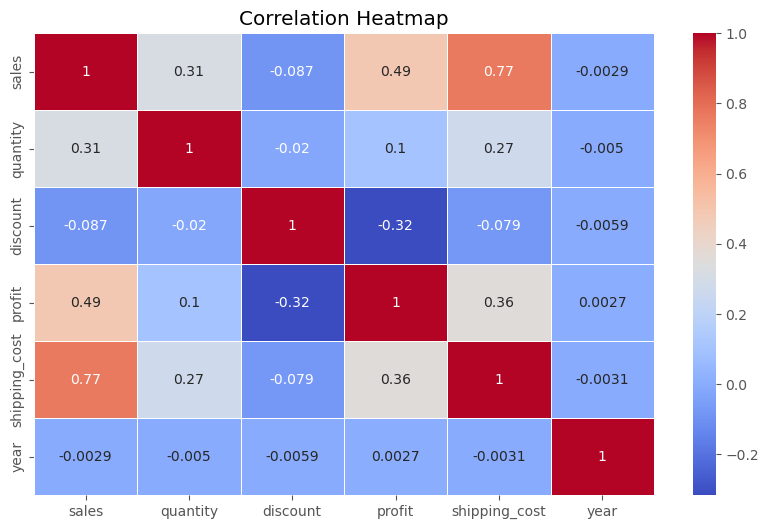

In [4]:
df['sales'] = pd.to_numeric(df['sales'].astype(str).str.replace(',', ''), errors='coerce')

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols) <= 1:
    print("⚠️ Not enough numerical columns for correlation heatmap.")
else:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

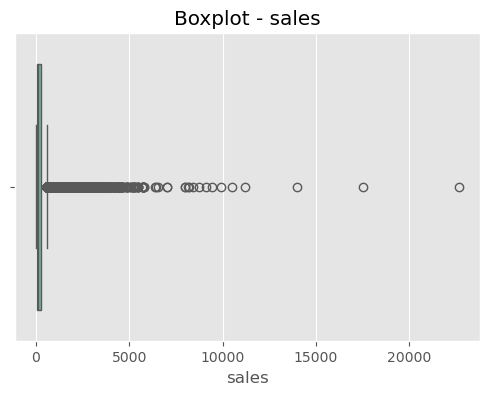

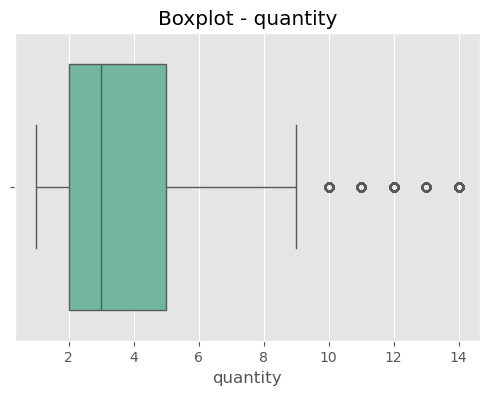

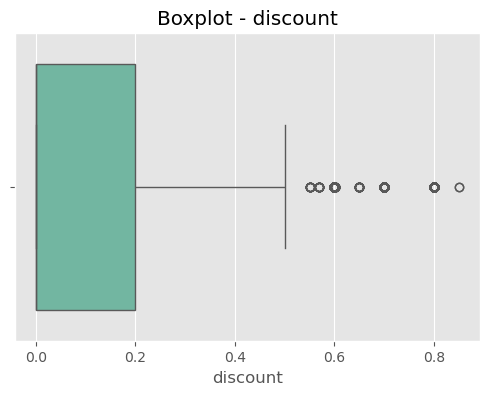

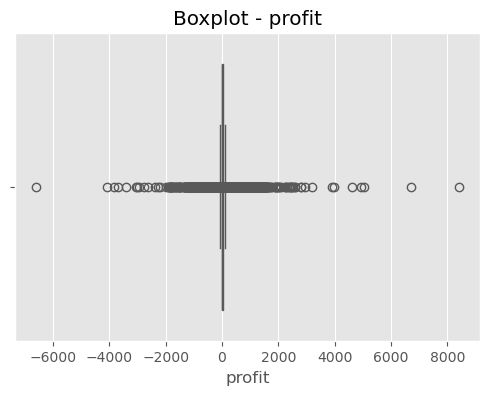

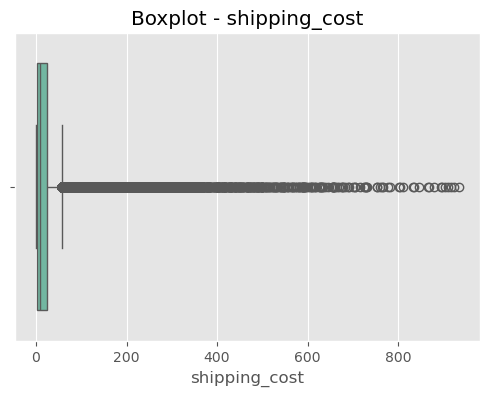

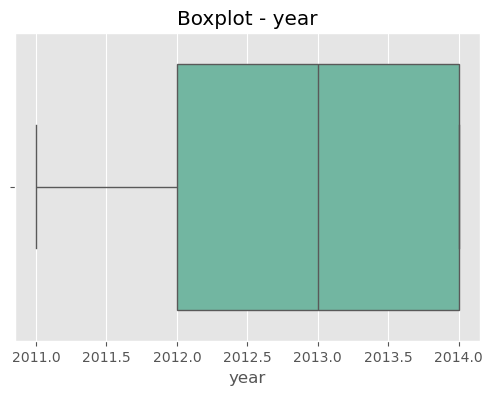

In [5]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

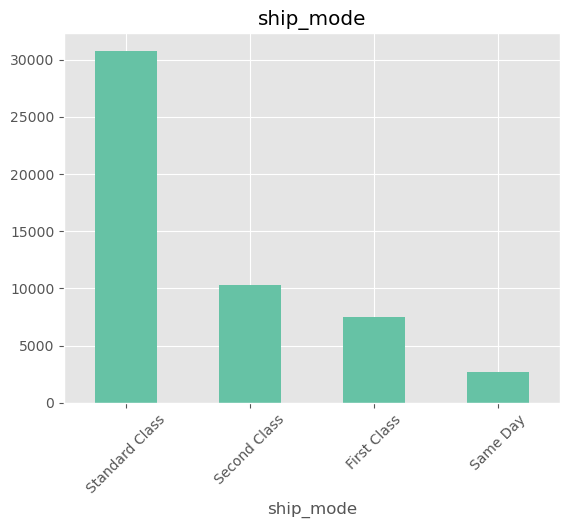

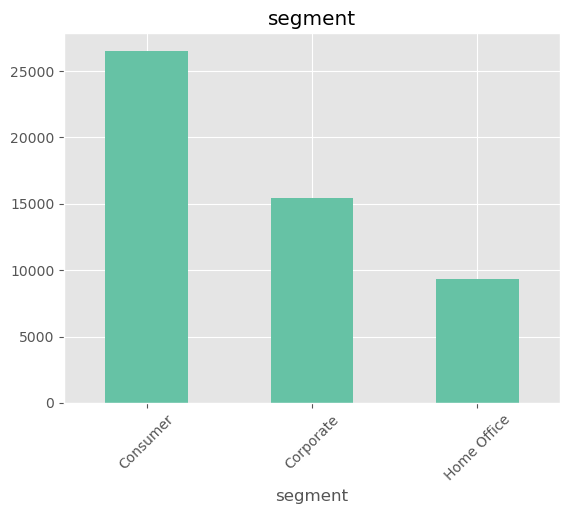

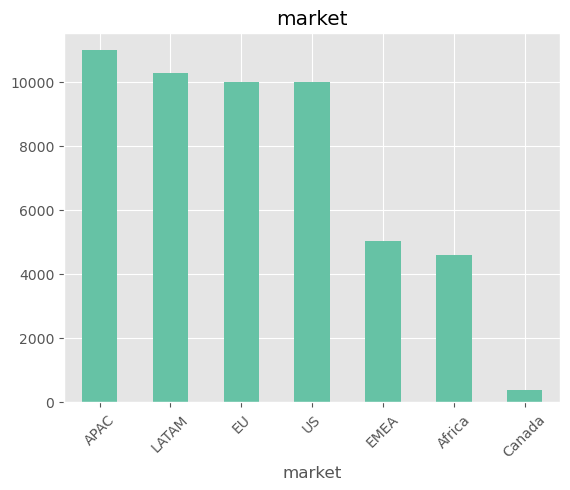

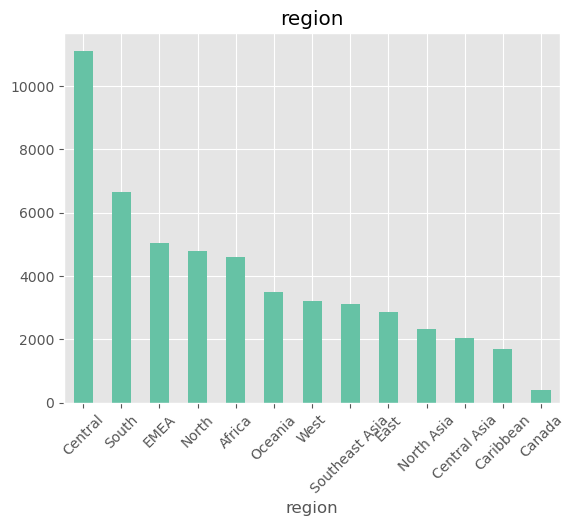

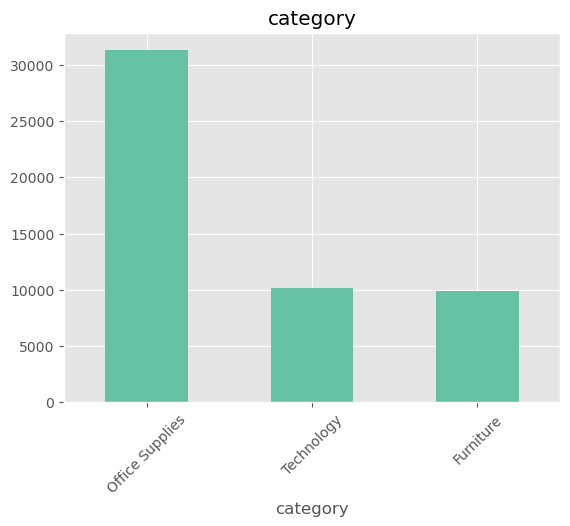

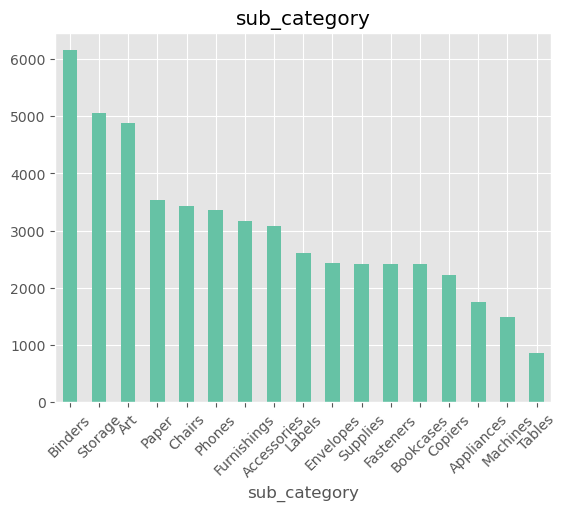

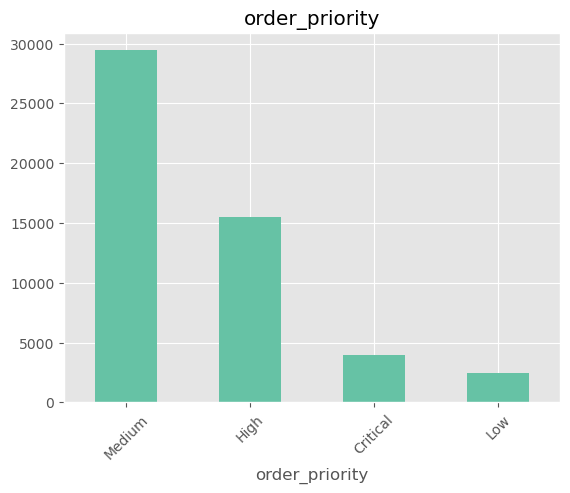

In [6]:
skip = ['order_id','product_id','customer_name','product_name','order_date','ship_date']

cats = [c for c in df.select_dtypes(exclude='number').columns 
        if c not in skip and df[c].nunique() <= 20]

if not cats:
    print("No suitable categorical columns found.")
else:
    for c in cats:
        df[c].value_counts().plot(kind='bar')
        plt.title(c)
        plt.xticks(rotation=45)
        plt.show()